Accuracy: 0.94

Confusion Matrix:
[[ 58   6]
 [  5 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



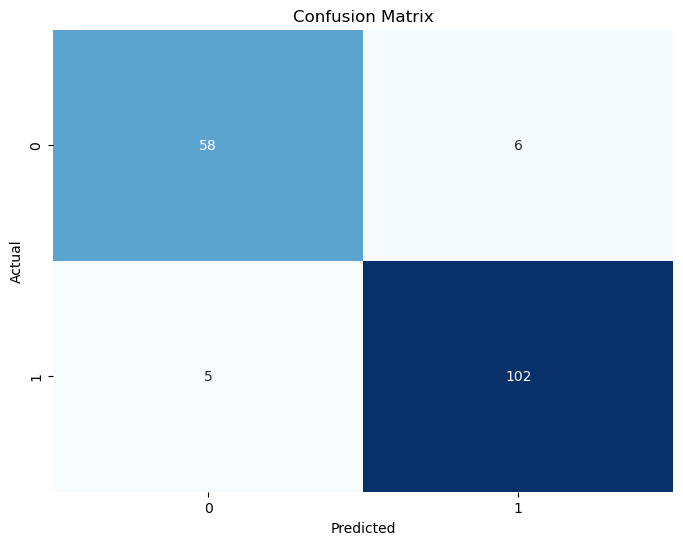

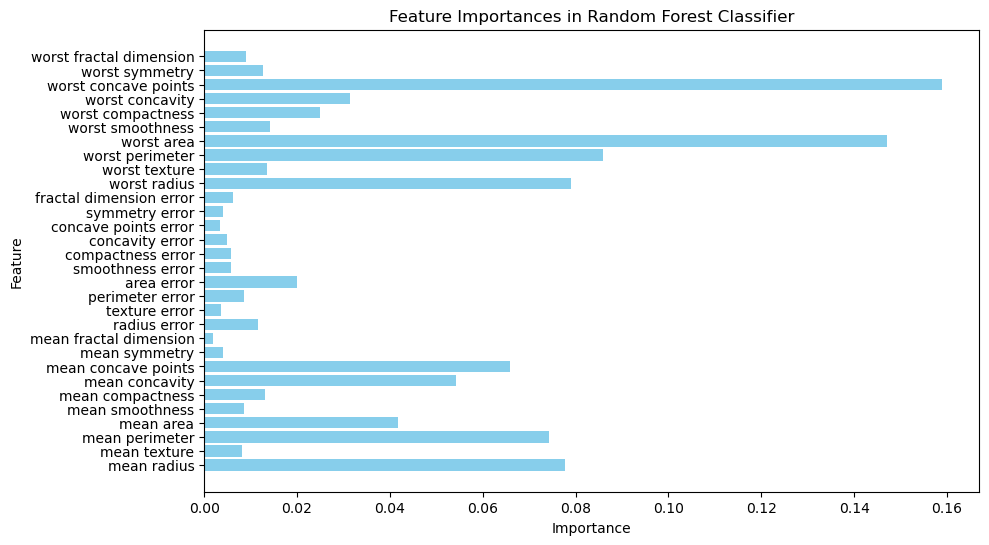

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data  # Features
y = cancer_data.target  # Target variable (0 = Malignant, 1 = Benign)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and train a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Model Evaluation: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion Matrix.png")
plt.show()

# Plot Feature Importances
feature_importances = rfc.feature_importances_
features = cancer_data.feature_names
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importances in Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("Feature Importances in Random Forest Classifier.png")
plt.show()
